In [1]:
!pip install seaborn -q

In [2]:
import json
import pandas as pd
import seaborn as sns

from pathlib import Path

In [3]:
with open("Results/metrics.json") as f:
    metrics = json.load(f)

In [22]:
prettier = {}
for k,v in metrics["satellite"].items():
    stem = Path(k).stem
    if stem in ["encoder_ssim_mse_l1_1_autoencoder", "encoder_ssim_mse_1_autoencoder"]:
        continue
    prettier[Path(k).stem] = {
        "mse x 100": v["mse"]*100,
        "l1 x 10": v["l1"]*10,
        "ssim": v["ssim"],
    }

In [24]:
df

,mse x 100,l1 x 10,ssim
encoder_l1_loss_minmax_autoencoder,0.111865,0.248276,0.892530
encoder_l1_loss_autoencoder,0.078425,0.189712,0.879973
encoder_corrected_autoencoder,0.075696,0.185895,0.881914
encoder_corrected_lr_point_0001_autoencoder,0.091007,0.205987,0.865589
encoder_corrected_lr_point01_autoencoder,0.094667,0.218517,0.872706
encoder_ssim_1minus_autoencoder,0.106957,0.236982,0.889155
encoder_ssim_mse_point1_autoencoder,0.060158,0.168721,0.903521
encoder_ssim_mse_point01_autoencoder,0.063549,0.171819,0.892799
encoder_ssim_l1_point1_autoencoder,0.063144,0.174467,0.891436
encoder_ssim_l1_point01_autoencoder,0.075056,0.198499,0.882647


<AxesSubplot:>

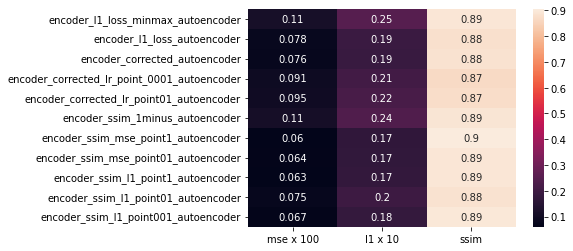

In [23]:
df = pd.DataFrame(prettier).transpose()
sns.heatmap(df, annot=True)

To do
- SSIM + 0.5 MSE
- SSIM + MSE
- SSIM + 0.1 L1

Train DVG with best 